# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops


Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [2]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, f1_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import shap


# Load the dataset
crops = pd.read_csv("soil_measures.csv")



c:\Users\Hande\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [4]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


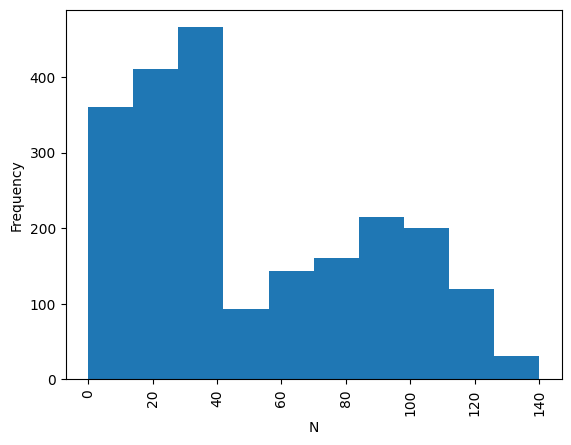

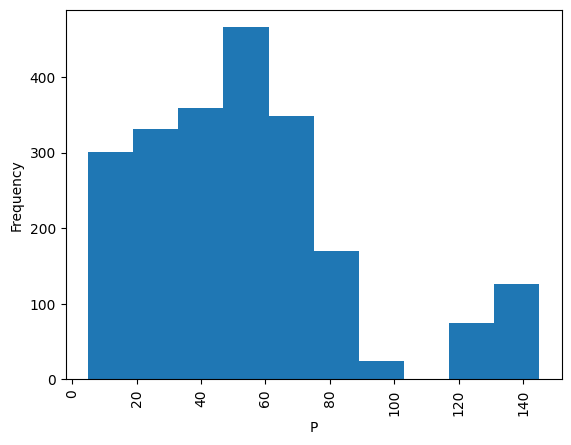

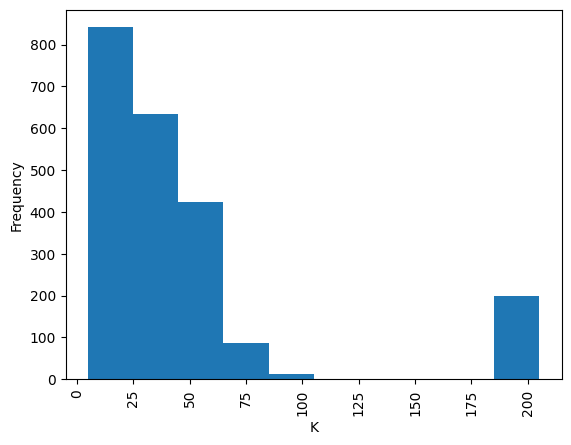

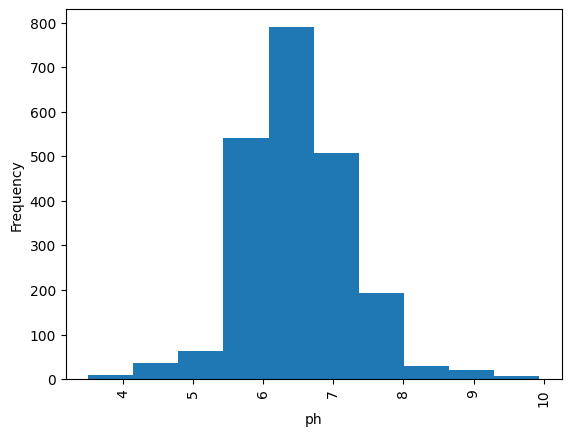

In [5]:
for column in crops.columns[:-1]:
    plt.figure()
    plt.hist(crops[column])
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
crops.crop.nunique()

22

In [7]:
crops_dummies = pd.get_dummies(crops, columns=['crop'], drop_first=True)
crops_dummies.head()

,N,P,K,ph,crop_banana,crop_blackgram,crop_chickpea,crop_coconut,crop_coffee,crop_cotton,...,crop_mango,crop_mothbeans,crop_mungbean,crop_muskmelon,crop_orange,crop_papaya,crop_pigeonpeas,crop_pomegranate,crop_rice,crop_watermelon
0,90,42,43,6.502985,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,85,58,41,7.038096,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,60,55,44,7.840207,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,35,40,6.980401,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,78,42,42,7.628473,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [8]:
crops_dummies = pd.concat([crops_dummies, crops], axis=1)
crops_dummies.head()

,N,P,K,ph,crop_banana,crop_blackgram,crop_chickpea,crop_coconut,crop_coffee,crop_cotton,...,crop_papaya,crop_pigeonpeas,crop_pomegranate,crop_rice,crop_watermelon,N,P,K,ph,crop
0,90,42,43,6.502985,False,False,False,False,False,False,...,False,False,False,True,False,90,42,43,6.502985,rice
1,85,58,41,7.038096,False,False,False,False,False,False,...,False,False,False,True,False,85,58,41,7.038096,rice
2,60,55,44,7.840207,False,False,False,False,False,False,...,False,False,False,True,False,60,55,44,7.840207,rice
3,74,35,40,6.980401,False,False,False,False,False,False,...,False,False,False,True,False,74,35,40,6.980401,rice
4,78,42,42,7.628473,False,False,False,False,False,False,...,False,False,False,True,False,78,42,42,7.628473,rice


In [9]:
X = crops_dummies.drop(columns=[col for col in crops_dummies.columns if col.startswith('crop_')])
y = crops_dummies[[col for col in crops_dummies.columns if col.startswith('crop_')]].idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
features = ['N', 'P', 'K', 'ph']


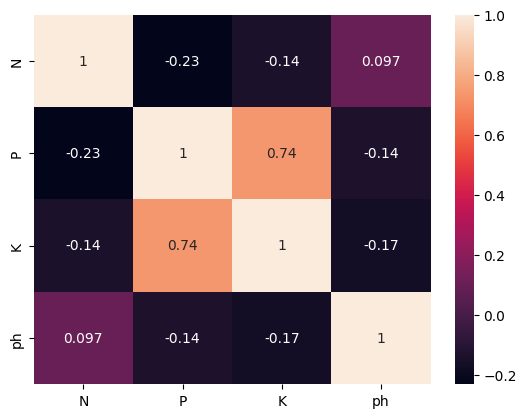

In [10]:
crops_corr = crops[["N", "P", "K", "ph"]].corr()
sns.heatmap(crops_corr, annot=True)
plt.show()


In [18]:
# Select the features for the model
final_features = ["N", "ph", "K", "P"]
label_encoder = LabelEncoder()
crops["crop"] = label_encoder.fit_transform(crops["crop"])
# Split the data with the features
X_train, X_test, y_train, y_test = train_test_split(
    crops[final_features],
    crops["crop"],
    test_size=0.2,
    random_state=10
)

# Train a Logistic Regression model on the data

log_reg = LogisticRegression(
    max_iter=2000, 
    multi_class="multinomial"
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
model_performance = f1_score(y_test, y_pred, average="weighted")
print('Logistic Regression model performance score: ' + str(model_performance))

Logistic Regression model performance score: 0.6815749203526307


c:\Users\Hande\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_performance_rf = accuracy_score(y_test, y_pred_rf)

print('Random Forest Classifer model score: ' + str(model_performance_rf))


Random Forest Classifer model score: 0.8136363636363636


I will  conduct further experiments if I can increase the accuaracy score by eliminating features thinking of correlation

In [13]:
feature_combinations = list(combinations(final_features, 3))
results = []
feature_importance_dict = {}
for combo in feature_combinations:
        # Select columns corresponding to the current combination
    X_train_subset = X_train[list(combo)]
    X_test_subset = X_test[list(combo)]

    # Create and train the RandomForestClassifier
    clf = RandomForestClassifier(random_state=10)
    clf.fit(X_train_subset, y_train)
    y_pred_combo = clf.predict(X_test_subset)
    # Predict and evaluate the classifier using accuracy
    scores = accuracy_score(y_test, y_pred_combo)
    feature_importances = clf.feature_importances_
    feature_importance_dict[combo] = feature_importances
    # Store the results
    results.append((combo, scores))

for combo, score in results:
    print(f"Features: {combo}, Accuracy: {score}")


Features: ('N', 'ph', 'K'), Accuracy: 0.725
Features: ('N', 'ph', 'P'), Accuracy: 0.6386363636363637
Features: ('N', 'K', 'P'), Accuracy: 0.6545454545454545
Features: ('ph', 'K', 'P'), Accuracy: 0.6068181818181818


The model performance is even lower. I will change my model to see if I could get higher performance.

In [14]:
gr = GradientBoostingClassifier(random_state=10)
gr.fit(X_train, y_train)
y_pred_gr = gr.predict(X_test)
model_performance_gr = accuracy_score(y_test, y_pred_gr)
print('Gradient Boosting Classifier model performance: ' + str(model_performance_gr))

Gradient Boosting Classifier model performance: 0.8


In [15]:
XGB= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=10)
dt= DecisionTreeClassifier(random_state=10)
vc = VotingClassifier(estimators=[('rf', rf), ('gr', gr), ('XGB', XGB), ('dt', dt)], voting='hard')


In [16]:
vc.fit(X_train, y_train)
vc_pred = vc.predict(X_test)
model_performance_vc = accuracy_score(y_test, vc_pred)
print('Voting Classifier\'s model performance: '  + str(model_performance_vc))


Voting Classifier's model performance: 0.8204545454545454


In [17]:
feature_importances = {}

# RandomForest
if hasattr(rf, 'feature_importances_'):
    feature_importances['RandomForest'] = rf.feature_importances_

# GradientBoosting
if hasattr(gr, 'feature_importances_'):
    feature_importances['GradientBoosting'] = gr.feature_importances_

# XGBoost
if hasattr(XGB, 'feature_importances_'):
    feature_importances['XGBoost'] = XGB.feature_importances_

# Print the feature importances
for model_name, importances in feature_importances.items():
    print(f"Feature importances for {model_name}:")
    for feature, importance in zip(final_features, importances):
        print(f"  {feature}: {importance}")

Feature importances for RandomForest:
  N: 0.2049002171415889
  ph: 0.2107456135499174
  K: 0.32709052251232446
  P: 0.25726364679616925
Feature importances for GradientBoosting:
  N: 0.2314150158232185
  ph: 0.1735400930637758
  K: 0.37211200341287026
  P: 0.22293288770013553


All applied models have similar feature importances, showing that K is the most important feature. We reached the highest score by applying VotingClassifier model in which we include RandomForest, GradientBoosting, Decision Tree Classifier and XGboost with score 0.82 